### Import the dataset from kaggle

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import random_split, DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### list the folders

In [12]:
import os

dir_path = "Lung X-Ray Image"

for dir in os.listdir(dir_path):
  print(dir_path + "/" + dir)

Lung X-Ray Image/Normal
Lung X-Ray Image/Viral Pneumonia


### import the dataset into pytorch

In [13]:
os.listdir(dir_path)

['Normal', 'Viral Pneumonia']

In [14]:
dataset = ImageFolder(dir_path)

In [15]:
print(f"total number of files in the dataset: {len(dataset)}")
print(f"labels in dataset: {dataset.classes}")
for cls in os.listdir(dir_path):
  print(f"{cls}: {len(os.listdir(os.path.join(dir_path, cls)))}")

total number of files in the dataset: 2350
labels in dataset: ['Normal', 'Viral Pneumonia']
Normal: 1250
Viral Pneumonia: 1100


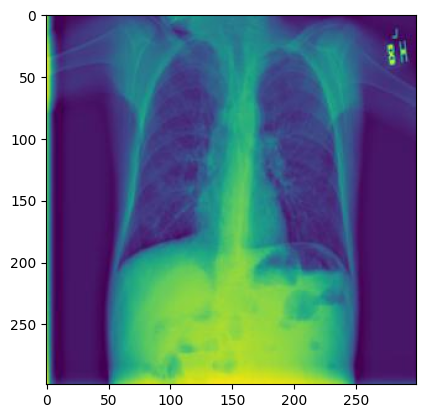

In [16]:
# view the sample image
img, lab = dataset[0]
plt.imshow(img)

## create an transformer object to reshape, convert to tensor and normalize the image data

1. Normalization Formula: The normalization process is straightforward. For each color channel (e.g., Red, Green, Blue), the pixel values are adjusted according to the following formula:

normalized_value = (original_value − mean)/std


Here, `original_value` is the original pixel value, `mean` is the mean value for that channel, and `std` is the standard deviation for that channel.

2. Why Mean and Standard Deviation of 0.5?: In many cases, mean and standard deviation values of 0.5 are used for image normalization. This is because the pixel values in typical images are in the range [0, 255], where 0 represents black and 255 represents white. Dividing by 255 brings the pixel values to the range [0, 1], which makes them suitable for neural network input. Then, subtracting 0.5 centers the pixel values around zero, which helps improve convergence during training. Similarly, setting the standard deviation to 0.5 scales the pixel values to have a reasonable range, ensuring that they are not too small or too large.

In [17]:
data_transform = tt.Compose([
    tt.Resize((224, 224)),  # Resize images to 224x224
    tt.ToTensor(),           # Convert images to tensors # Normalize images
    tt.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

### this time read the data with preprocessing

In [18]:
transformed_data = ImageFolder(root=dir_path, transform=data_transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label 1


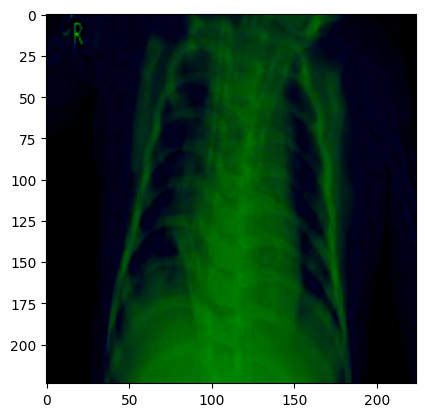

In [27]:
img, lab = transformed_data[1500]
plt.imshow(img.permute((1, 2, 0)))
print(f"label {lab}")

### set the train and validation size

In [30]:
val_size = int(len(transformed_data) * 0.25)
train_size = len(transformed_data) - val_size

### lets split the data using random_split

In [31]:
train_ds, val_ds = random_split(transformed_data, [train_size, val_size])
print(f"train dataset size: {len(train_ds)}")
print(f"validation dataset size: {len(val_ds)}")

train dataset size: 1763
validation dataset size: 587


### create a batches to train a data using `DataLoader`

1. Setting `pin_memory=True` in the `DataLoader` constructor tells PyTorch to allocate the data batches fetched from the dataset onto pinned memory. Pinned memory is a memory type in CUDA (NVIDIA's parallel computing platform and programming model) that's directly accessible by the GPU.

2.  If you're training your model on a CPU rather than a GPU, setting `pin_memory=True` won't provide any performance benefits.

3. Using the `num_workers` argument in the `DataLoader` constructor allows you to specify the number of worker processes to use for data loading. These worker processes load the data in parallel, which can speed up the data loading process, especially when you have multiple CPU cores available.

In [32]:
batch_size = 64

train_dl = DataLoader(
    train_ds,
    batch_size,
    shuffle = True,
    num_workers = 2,
    pin_memory = True
)

val_dl = DataLoader(
    val_ds,
    batch_size,
    num_workers = 2,
    pin_memory = True
)

In [36]:
print(f"number of batchesin train data loder: {len(train_dl)}")
print(f"number of batchesin val data loder: {len(val_dl)}")

number of batchesin train data loder: 28
number of batchesin val data loder: 10


### Define the device to be used for training (GPU available, else CPU)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [34]:
device

device(type='cpu')

# **Lets make a simple practice**

In [35]:
conv = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
pool = nn.MaxPool2d(2, 2)

In [22]:
# Assuming train_dl is your DataLoader object
for batch in train_dl:
    data, labels = batch
    print("Data shape:", data.shape)
    print("Labels shape:", labels.shape)
    break  # Print the shape of the first batch only


Data shape: torch.Size([64, 3, 224, 224])
Labels shape: torch.Size([64])


### view the values of first image in data with 3 chanels of each image

In [ ]:
data[0]

tensor([[[-0.6941, -0.6941, -0.6863,  ..., -0.5922, -0.5686, -0.5608],
         [-0.6941, -0.6863, -0.6863,  ..., -0.5922, -0.5843, -0.5765],
         [-0.7020, -0.6941, -0.6941,  ..., -0.5922, -0.5922, -0.5843],
         ...,
         [-0.5922, -0.6549, -0.6941,  ..., -0.4431, -0.4353, -0.4431],
         [-0.6157, -0.6471, -0.7020,  ..., -0.4431, -0.4353, -0.4431],
         [-0.6314, -0.6627, -0.6941,  ..., -0.4431, -0.4353, -0.4431]],

        [[-0.0588, -0.0588, -0.0510,  ..., -0.2784, -0.2863, -0.2863],
         [-0.0510, -0.0431, -0.0353,  ..., -0.2784, -0.2706, -0.2784],
         [-0.0275, -0.0196, -0.0196,  ..., -0.2627, -0.2706, -0.2706],
         ...,
         [-0.2706, -0.1294,  0.0824,  ..., -0.6706, -0.6627, -0.6549],
         [-0.2471, -0.0980,  0.0745,  ..., -0.6706, -0.6627, -0.6549],
         [-0.2235, -0.0824,  0.0902,  ..., -0.6706, -0.6627, -0.6549]],

        [[ 0.0902,  0.0902,  0.0980,  ...,  0.0824,  0.0902,  0.0902],
         [ 0.0980,  0.1059,  0.1059,  ...,  0

### passing the first image in first convalutional layer

In [23]:
out = conv(data)
out.shape

torch.Size([64, 32, 224, 224])

### view the values in first image of out with 32 chanels of each image

In [ ]:
out[0]

tensor([[[ 0.0078,  0.1459,  0.1434,  ...,  0.2698,  0.2780,  0.2252],
         [ 0.1808,  0.2270,  0.2196,  ...,  0.3679,  0.3647,  0.2958],
         [ 0.1774,  0.2143,  0.2124,  ...,  0.3640,  0.3603,  0.2949],
         ...,
         [ 0.2230,  0.2716,  0.1376,  ...,  0.5446,  0.5447,  0.3961],
         [ 0.2217,  0.2579,  0.1140,  ...,  0.5453,  0.5441,  0.3965],
         [ 0.4619,  0.4446,  0.3221,  ...,  0.6117,  0.6095,  0.4647]],

        [[-0.0604, -0.0644, -0.0630,  ..., -0.0959, -0.0929, -0.0639],
         [-0.0815, -0.0660, -0.0654,  ..., -0.0705, -0.0718,  0.0055],
         [-0.0781, -0.0657, -0.0637,  ..., -0.0670, -0.0680,  0.0075],
         ...,
         [-0.1213, -0.0685, -0.0371,  ..., -0.0896, -0.0881, -0.0455],
         [-0.1175, -0.0572, -0.0301,  ..., -0.0885, -0.0877, -0.0476],
         [-0.1240, -0.1202, -0.1046,  ..., -0.0700, -0.0700,  0.0276]],

        [[-0.2040, -0.3623, -0.3632,  ..., -0.3474, -0.3516, -0.1906],
         [-0.1538, -0.2889, -0.2866,  ..., -0

In [24]:
rel_out = torch.relu(out)
rel_out.shape

torch.Size([64, 32, 224, 224])

### after passing out in relu activation all the negative values are become zero

In [ ]:
rel_out[0]

tensor([[[0.0078, 0.1459, 0.1434,  ..., 0.2698, 0.2780, 0.2252],
         [0.1808, 0.2270, 0.2196,  ..., 0.3679, 0.3647, 0.2958],
         [0.1774, 0.2143, 0.2124,  ..., 0.3640, 0.3603, 0.2949],
         ...,
         [0.2230, 0.2716, 0.1376,  ..., 0.5446, 0.5447, 0.3961],
         [0.2217, 0.2579, 0.1140,  ..., 0.5453, 0.5441, 0.3965],
         [0.4619, 0.4446, 0.3221,  ..., 0.6117, 0.6095, 0.4647]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0055],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0075],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0276]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

### after passing rel_out in MaxPool size of an each image will reduced from 224 to 112

In [25]:
pool_data = pool(rel_out)
pool_data.shape

torch.Size([64, 32, 112, 112])

# Define the CNN model

1. In PyTorch, view is a method that allows you to reshape a tensor. The `-1` argument in view is a placeholder for an unknown dimension. When you specify `-1` for one dimension, PyTorch automatically calculates the size of that dimension based on the total number of elements in the tensor and the sizes of the other dimensions, ensuring that the total number of elements remains the same.


In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)  # 2 classes: normal and pneumonia

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28) # reshape the theird layer output to single dimension
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### define model, criterion(loss function) and optimizer(gradian desient)

In [44]:
# Initialize model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In PyTorch, `torch.optim.Adam()` is an optimizer class that implements the Adam optimization algorithm. This algorithm is an extension of stochastic gradient descent `(SGD)`, which computes adaptive learning rates for each parameter. It's particularly well-suited for training deep neural networks.

### create a training loop

In [45]:
# Define a directory to save the model checkpoints
checkpoint_dir = 'model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

In [46]:
# Training loop
def train_model(model, train_dl, val_dl, criterion, optimizer, num_epochs=5):
    valuation = {
        'Train Loss': [],
        'Val Loss': [],
        'Val Accuracy': []
    }
    for epoch in range(1, num_epochs+1):
        model.train()
        train_loss = 0.0
        for images, labels in train_dl:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0) # add the loss for all images in train_loss
        train_loss = train_loss / len(train_dl.dataset)

        # Validation loop

        model.eval()
        val_loss = 0.0
        correct_preds = 0
        total_preds = 0
        with torch.no_grad():
            for images, labels in val_dl:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)  # add the loss for all images in val_loss
                _, predicted = torch.max(outputs, 1)
                correct_preds += (predicted == labels).sum().item()
                total_preds += labels.size(0)
        val_loss = val_loss / len(val_dl.dataset)
        val_accuracy = correct_preds / total_preds
        print(f'Epoch {epoch}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
        valuation['Train Loss'].append(train_loss)
        valuation['Val Loss'].append(val_loss)
        valuation['Val Accuracy'].append(val_accuracy)

        checkpoint_path = os.path.join(checkpoint_dir, f'model_{epoch}.pth') # create the path to save a model parameters
        torch.save(model.state_dict(), checkpoint_path)
    return valuation


1. During the training phase, `optimizer.step()` is indeed a significant reason why we don't use `torch.no_grad()`. When calling `optimizer.step()`, the optimizer updates the model parameters based on the computed gradients.


2. In PyTorch, when you define a custom neural network model by subclassing `nn.Module`, you override the `forward` method to define how input data should pass through the network's layers. This `forward` method is automatically called when you pass input data to an instance of your model. Using `model(images)` is more concise and idiomatic in PyTorch. It's a shorthand for invoking the `forward` method of the model. Therefore, there's no need to explicitly call `model.forward(images)` in the training loop.

In [47]:
val_record = train_model(
    model = model,
    train_dl = train_dl,
    val_dl = val_dl,
    criterion = criterion,
    optimizer = optimizer,
    num_epochs=10
)

Epoch 1/10, Train Loss: 0.4630, Val Loss: 0.2115, Val Accuracy: 0.9114
Epoch 2/10, Train Loss: 0.1700, Val Loss: 0.1440, Val Accuracy: 0.9540
Epoch 3/10, Train Loss: 0.1084, Val Loss: 0.0815, Val Accuracy: 0.9676
Epoch 4/10, Train Loss: 0.0809, Val Loss: 0.0644, Val Accuracy: 0.9710
Epoch 5/10, Train Loss: 0.0708, Val Loss: 0.0742, Val Accuracy: 0.9710
Epoch 6/10, Train Loss: 0.0601, Val Loss: 0.0767, Val Accuracy: 0.9744
Epoch 7/10, Train Loss: 0.0349, Val Loss: 0.0523, Val Accuracy: 0.9830
Epoch 8/10, Train Loss: 0.0261, Val Loss: 0.0508, Val Accuracy: 0.9796
Epoch 9/10, Train Loss: 0.0231, Val Loss: 0.1159, Val Accuracy: 0.9523
Epoch 10/10, Train Loss: 0.0990, Val Loss: 0.0737, Val Accuracy: 0.9625


In [52]:
val_record

{'Train Loss': [0.46303865752197165,
  0.16997693446942913,
  0.10841750118604655,
  0.08086466834464671,
  0.0708414341362169,
  0.06014911851766971,
  0.03487870853206209,
  0.026063849343255296,
  0.02310621930350736,
  0.09896607918879287],
 'Val Loss': [0.21146354216327048,
  0.14395140974546006,
  0.08149080515364772,
  0.06439507133890661,
  0.07419397903834764,
  0.07671587734944878,
  0.05225770151340982,
  0.0507763843948507,
  0.11591266935891147,
  0.07367260669385046],
 'Val Accuracy': [0.9114139693356048,
  0.9540034071550255,
  0.9676320272572402,
  0.9710391822827938,
  0.9710391822827938,
  0.9744463373083475,
  0.9829642248722317,
  0.979557069846678,
  0.9522998296422487,
  0.9625212947189097]}

In [51]:
pd.DataFrame(val_record)

,Train Loss,Val Loss,Val Accuracy
0,0.463039,0.211464,0.911414
1,0.169977,0.143951,0.954003
2,0.108418,0.081491,0.967632
3,0.080865,0.064395,0.971039
4,0.070841,0.074194,0.971039
5,0.060149,0.076716,0.974446
6,0.034879,0.052258,0.982964
7,0.026064,0.050776,0.979557
8,0.023106,0.115913,0.952300
9,0.098966,0.073673,0.962521


# vishualize the moled results

In [3]:
import pandas as pd
result_df = pd.DataFrame({
    'Epochs': range(1, 11),  # Assuming epochs from 1 to 10
    'Train Loss': [0.46303865752197165,  0.16997693446942913,  0.10841750118604655,  0.08086466834464671,  0.0708414341362169, 0.06014911851766971,  0.03487870853206209,  0.026063849343255296, 0.02310621930350736,  0.09896607918879287],
    'Val Loss': [0.21146354216327048,  0.14395140974546006,  0.08149080515364772,  0.06439507133890661,  0.07419397903834764,  0.07671587734944878,  0.05225770151340982,  0.0507763843948507, 0.11591266935891147, 0.07367260669385046],
    'Val Accuracy': [0.9114139693356048,  0.9540034071550255,  0.9676320272572402,  0.9710391822827938,  0.9710391822827938,  0.9744463373083475,  0.9829642248722317,  0.979557069846678,  0.9522998296422487,  0.9625212947189097]
})

In [13]:
result_df

,Epochs,Train Loss,Val Loss,Val Accuracy
0,1,0.463039,0.211464,0.911414
1,2,0.169977,0.143951,0.954003
2,3,0.108418,0.081491,0.967632
3,4,0.080865,0.064395,0.971039
4,5,0.070841,0.074194,0.971039
5,6,0.060149,0.076716,0.974446
6,7,0.034879,0.052258,0.982964
7,8,0.026064,0.050776,0.979557
8,9,0.023106,0.115913,0.952300
9,10,0.098966,0.073673,0.962521


In [ ]:
df_long = pd.melt(result_df, id_vars = 'Epochs', var_name='Metrix', value_name='Value')
df_long

<Axes: xlabel='Epochs', ylabel='Value'>

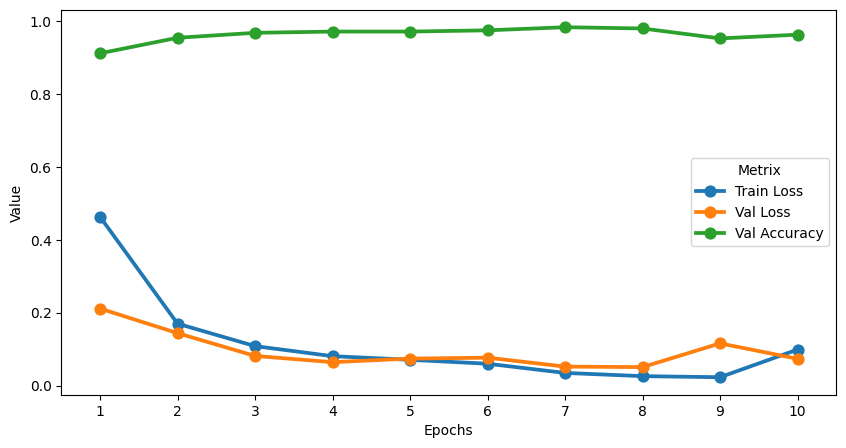

In [19]:
#plot the tuned accuracy values
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
sns.pointplot(x='Epochs', y='Value', hue='Metrix' ,data=df_long, ax=ax)

### Load the saved model

In [9]:
checkPoint_path = 'model_checkpoints\model_4.pth'
checkPoint = torch.load(checkPoint_path)

best_model = CNN().to(device)
best_model.load_state_dict(checkPoint)

<All keys matched successfully>

In [54]:
img, lab = transformed_data[10]
best_model.eval()
output = best_model(img.to(device))
output

tensor([[ 4.3537, -4.3323]], grad_fn=<AddmmBackward0>)

In [55]:
# Get predicted classes
_, predicted_classes = torch.max(output, 1)
# Print the predicted classes
print("Predicted Classes:", predicted_classes.item())
# If you want to get probabilities, you can apply softmax
probabilities = torch.softmax(output, dim=1)
# Print the predicted probabilities
print("Predicted Probabilities:", probabilities)

Predicted Classes: 0
Predicted Probabilities: tensor([[9.9983e-01, 1.6890e-04]], grad_fn=<SoftmaxBackward0>)


In [53]:
_

tensor([4.3537], grad_fn=<MaxBackward0>)